In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv(Path('../Resources/CleanedDataset.csv'))
df = df.drop(columns=[
    'Unnamed: 0',
    'CODE_GENDER_F',
    'FLAG_OWN_CAR_N',
    'FLAG_OWN_REALTY_N'
    ])
df.head()

,AMT_INCOME_TOTAL,AGE,YEARS_EXPERIENCE,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,112500.0,58,3,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,270000.0,52,8,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,270000.0,52,8,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,270000.0,52,8,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,270000.0,46,2,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
status_df = pd.read_csv(Path('../Resources/Status.csv'))
status_df.head()

,STATUS
0,0
1,1
2,0
3,0
4,1


In [25]:
df.nunique()

AMT_INCOME_TOTAL                                     189
AGE                                                   48
YEARS_EXPERIENCE                                      43
CODE_GENDER_F                                          2
CODE_GENDER_M                                          2
FLAG_OWN_CAR_N                                         2
FLAG_OWN_CAR_Y                                         2
FLAG_OWN_REALTY_N                                      2
FLAG_OWN_REALTY_Y                                      2
NAME_INCOME_TYPE_Commercial associate                  2
NAME_INCOME_TYPE_Pensioner                             2
NAME_INCOME_TYPE_State servant                         2
NAME_INCOME_TYPE_Student                               2
NAME_INCOME_TYPE_Working                               2
NAME_EDUCATION_TYPE_Academic degree                    2
NAME_EDUCATION_TYPE_Higher education                   2
NAME_EDUCATION_TYPE_Incomplete higher                  2
NAME_EDUCATION_TYPE_Lower secon

In [26]:
label_enc = LabelEncoder()

importances_list = {}
for column in df.columns:
    X = label_enc.fit_transform(df[column]).reshape(-1,1)
    y = label_enc.fit_transform(status_df['STATUS'])
    importances = mutual_info_classif(X, y)
    importances_list[column] = importances[0]

In [27]:
print(importances_list)

{'AMT_INCOME_TOTAL': 0.005716942888205789, 'AGE': 0.003114710132058107, 'YEARS_EXPERIENCE': 0.004211333516887628, 'CODE_GENDER_F': 0.002878517523229762, 'CODE_GENDER_M': 0.0026409228811470342, 'FLAG_OWN_CAR_N': 0, 'FLAG_OWN_CAR_Y': 0.0026008751536696906, 'FLAG_OWN_REALTY_N': 0, 'FLAG_OWN_REALTY_Y': 0, 'NAME_INCOME_TYPE_Commercial associate': 0, 'NAME_INCOME_TYPE_Pensioner': 0.0016596353693829613, 'NAME_INCOME_TYPE_State servant': 0.0031333512408069364, 'NAME_INCOME_TYPE_Student': 0.004341095628821456, 'NAME_INCOME_TYPE_Working': 0, 'NAME_EDUCATION_TYPE_Academic degree': 0.005728299288517036, 'NAME_EDUCATION_TYPE_Higher education': 0, 'NAME_EDUCATION_TYPE_Incomplete higher': 0, 'NAME_EDUCATION_TYPE_Lower secondary': 0.007621065918022696, 'NAME_EDUCATION_TYPE_Secondary / secondary special': 0.0012817526991721895, 'NAME_FAMILY_STATUS_Civil marriage': 0, 'NAME_FAMILY_STATUS_Married': 5.739064766219215e-05, 'NAME_FAMILY_STATUS_Separated': 0, 'NAME_FAMILY_STATUS_Single / not married': 0, 'NA

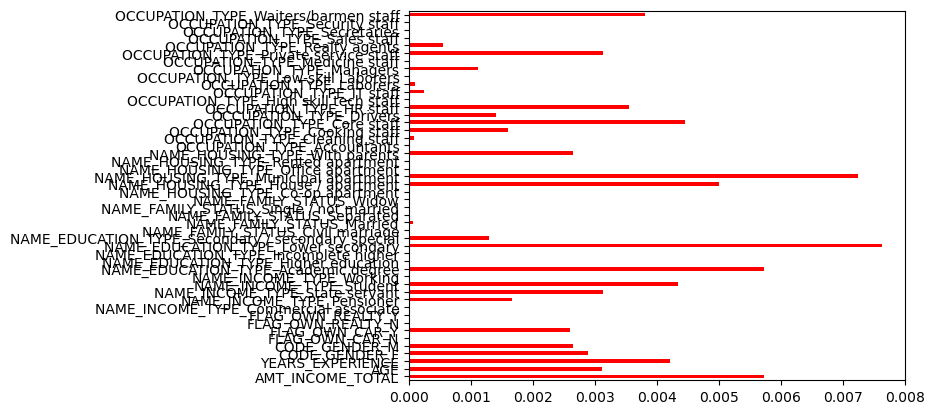

In [29]:
importances_list_df = pd.Series(importances_list)
importances_list_df.plot(kind='barh', color='red')
plt.show()